# Gitcoin grant participant Donations: A Public Goods Production Function Analysis

## Motivation
The goal of this notebok is to examine the production of public goods via Gitcoin Grants (https://gitcoin.co/grants/).

We are especially interested in learning general lessons about how build donate to produce public goods via online platforms. A major goal of this analysis is to work to identify what kinds of "production functions" exist in the Gitcoin context, with emphasis on Oliver and Marwell's "Theory of Critical Mass" (https://en.wikipedia.org/wiki/Critical_mass_(sociodynamics)). Of particular importance to critical mass is identifying if a public good has an accelerating or decelerating production function; as more people contriubte, does the marginal value for other contributors go up or down? This substack piece elaborates on this point further: https://govrnance.substack.com/p/deliberate-public-goods-games

Gitcoin allows anyone to donate cryptocurrency to various projects. When people make contributions during a "Round" of fund matching, projects will receive additional donations allocated based on Quadratic Funding (https://wtfisqf.com/?grant=&grant=&grant=&grant=&match=1000). In short: "Number of contributors matters more than amount funded".


Gitcoin public grant rounds provide an opportunity to quantitatively investigate. Best of all -- the process is explicitly framed as a public goods game. Many other contexts involve the production of semi-public goods, but in the Gitcoin context everyone knows they're playing a public goods game.

We can assume there’s a degree of socialness / “interaction between agents” as the game theorists might see… people are watching how other people donate!

About the analysis:
* First we look "Grant-wise": each grant is a public good that unfolds over time (rounds)
* Then we look "Round-wise": each round is a public good ecosystem with summary behavior 


## Inputs and Outputs
Critical mass theory for public goods is focused on relating y, the "amount" of public good produced with x, the amount of contributions made by a group of people.

What inputs and outputs can we study?

* y_{amount}: Use total amount donated to a project as a weak proxy of the "public goods output" of that project
* y_{contributors}: Use total # contributors as a proxy.
* For x, we focus on the total amount contributed (1 unit of contribution = 1 ETH, 1 dollar, etc.)

Ideally, we want to know about counterfactuals. How much public utility would project X have generated if it received more donations, or less?

## Grouping Data
What units of analysis can we study?
* At the grant-round level: break the data into groups based on each grant (different project) and round (time period).
* At the grant level: break the data groups based on each grant. Count all rounds together
* Gitcoin as one public good: don't group data at all. Consider all donations to any grant address.

* Open Questions
  * How do people's donation behaviors affect other people?  (plots cumulative donations vs time)
  * Inputs vs. Outputs. Inputs = # of people, amount raised. Outputs = good delivered.
  * Can making it to the next round be a proxy for success? (after filtering out projects that exited due to success/failure)

## About the Data

1. We begin by using Gitcoin API to get a list of every Gitcoin grant and its wallet address.

2. use etherscan to list all transactions for each wallet address.

3. use Gitcoin API to get time period and contributor address for each round of Gitcoin grants.

4. Result: Observations of the following form: [Contributor Address, Donation Amount, Donation Timestamp, Recipient Grant Address, Round #]

## Imports

In [ ]:
import datetime
import json
import requests

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The `scrape.ipynb` notebook creates `savepoint.csv`. This file contains one observation per etherscan-identified transaction. Should include all transactions for addresses in the Gitcoin grants list.

In [ ]:
df = pd.read_csv('savepoint_2021-10-27.csv', index_col=0)
df[:3]

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations
0,13198991,1631289899,0x19447f4db56074a58ed898d82792b1840cae17cc9f49...,7,0xad8c19b380dbf724d49032badc36a52f85adc3b498d1...,21,0x0cbbc6ae48d9d3e14079aa15fab79a93b9f14796,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,40000000000000000,21000,201000000000,0,1.0,0x,NaN,1712459,21000,303446
1,13199002,1631290114,0x9069dd7c39248b635b4d4129a9f747b0fbed1df80b7e...,0,0xceb3d9ed463a983d7472fa197aabebefca533e950aab...,306,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0xdac17f958d2ee523a2206206994597c13d831ec7,0,94795,101574817824,0,1.0,0xa9059cbb000000000000000000000000a5ef5f870771...,NaN,27995552,58397,303435
2,13199011,1631290177,0x2b3732bade815729a849a6fa52b9390bfface387fc2b...,1,0xf447eb0e038a705484ab75593f86bc27767db937ce83...,311,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0x0cbbc6ae48d9d3e14079aa15fab79a93b9f14796,30726977495774872,21000,81080397574,0,1.0,0x,NaN,25089151,21000,303426


In [ ]:
with open('grants.json', 'r') as f:
    grants = json.load(f)


'''
for key,projName in grants.items():
    #print(key)
    #print(projName)
'''


'\nfor key,projName in grants.items():\n    #print(key)\n    #print(projName)\n'

In [ ]:
df['projectName'] = df.to.map(grants)
df[:2]

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,projectName
0,13198991,1631289899,0x19447f4db56074a58ed898d82792b1840cae17cc9f49...,7,0xad8c19b380dbf724d49032badc36a52f85adc3b498d1...,21,0x0cbbc6ae48d9d3e14079aa15fab79a93b9f14796,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,40000000000000000,21000,201000000000,0,1.0,0x,NaN,1712459,21000,303446,NFTShop Your [FREE] NFT Shop Storefront on Flo...
1,13199002,1631290114,0x9069dd7c39248b635b4d4129a9f747b0fbed1df80b7e...,0,0xceb3d9ed463a983d7472fa197aabebefca533e950aab...,306,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0xdac17f958d2ee523a2206206994597c13d831ec7,0,94795,101574817824,0,1.0,0xa9059cbb000000000000000000000000a5ef5f870771...,NaN,27995552,58397,303435,NaN


In [ ]:
df['fromName'] = df['from'].map(grants)
df[:5]

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,projectName,fromName
0,13198991,1631289899,0x19447f4db56074a58ed898d82792b1840cae17cc9f49...,7,0xad8c19b380dbf724d49032badc36a52f85adc3b498d1...,21,0x0cbbc6ae48d9d3e14079aa15fab79a93b9f14796,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,40000000000000000,21000,201000000000,0,1.0,0x,NaN,1712459,21000,303446,NFTShop Your [FREE] NFT Shop Storefront on Flo...,NaN
1,13199002,1631290114,0x9069dd7c39248b635b4d4129a9f747b0fbed1df80b7e...,0,0xceb3d9ed463a983d7472fa197aabebefca533e950aab...,306,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0xdac17f958d2ee523a2206206994597c13d831ec7,0,94795,101574817824,0,1.0,0xa9059cbb000000000000000000000000a5ef5f870771...,NaN,27995552,58397,303435,NaN,NFTShop Your [FREE] NFT Shop Storefront on Flo...
2,13199011,1631290177,0x2b3732bade815729a849a6fa52b9390bfface387fc2b...,1,0xf447eb0e038a705484ab75593f86bc27767db937ce83...,311,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0x0cbbc6ae48d9d3e14079aa15fab79a93b9f14796,30726977495774872,21000,81080397574,0,1.0,0x,NaN,25089151,21000,303426,NaN,NFTShop Your [FREE] NFT Shop Storefront on Flo...
3,13221357,1631589568,0x776d0ec5b42ae36c51594318032c5cc7eb1329ad591b...,2,0xaca7d72be2090ac8253252646da7f7a6b1dc092ae726...,394,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0x0fd8348a05e93c703253c23763d4e836529bc87e,300000000000000,21000,53119523904,0,1.0,0x,NaN,26012454,21000,281080,Designing schwag in store,NFTShop Your [FREE] NFT Shop Storefront on Flo...
4,13221365,1631589710,0xc765b90ed4a0a46559b947e4f4a68eede8f26f463a3c...,3,0x80dd61aa43168581e7478f928a3e9d085e4ee1ff59cd...,208,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0x0fd8348a05e93c703253c23763d4e836529bc87e,666000000000000,21000,58632901610,0,1.0,0x,NaN,13126545,21000,281072,Designing schwag in store,NFTShop Your [FREE] NFT Shop Storefront on Flo...


Drop rows that are not TO a grant. (i.e. drop the from rows)

In [ ]:
drop_mask1 = df.projectName.isna()
print(sum(drop_mask1))
df = df[~drop_mask1]
len(df)

388696


111383

Create a dt column

In [ ]:
df.loc[:, 'dt'] = pd.to_datetime(df.timeStamp, unit='s')
df[:2]

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,...,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,projectName,fromName,dt
0,13198991,1631289899,0x19447f4db56074a58ed898d82792b1840cae17cc9f49...,7,0xad8c19b380dbf724d49032badc36a52f85adc3b498d1...,21,0x0cbbc6ae48d9d3e14079aa15fab79a93b9f14796,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,40000000000000000,21000,...,0,1.0,0x,NaN,1712459,21000,303446,NFTShop Your [FREE] NFT Shop Storefront on Flo...,NaN,2021-09-10 16:04:59
3,13221357,1631589568,0x776d0ec5b42ae36c51594318032c5cc7eb1329ad591b...,2,0xaca7d72be2090ac8253252646da7f7a6b1dc092ae726...,394,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0x0fd8348a05e93c703253c23763d4e836529bc87e,300000000000000,21000,...,0,1.0,0x,NaN,26012454,21000,281080,Designing schwag in store,NFTShop Your [FREE] NFT Shop Storefront on Flo...,2021-09-14 03:19:28


Covert from wei (10^18) to eth 

In [ ]:
df['value_in_eth'] = df.value.astype(np.float128).apply(lambda x: x / 10**18)
df[:2]

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,...,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,projectName,fromName,dt,value_in_eth
0,13198991,1631289899,0x19447f4db56074a58ed898d82792b1840cae17cc9f49...,7,0xad8c19b380dbf724d49032badc36a52f85adc3b498d1...,21,0x0cbbc6ae48d9d3e14079aa15fab79a93b9f14796,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,40000000000000000,21000,...,1.0,0x,NaN,1712459,21000,303446,NFTShop Your [FREE] NFT Shop Storefront on Flo...,NaN,2021-09-10 16:04:59,0.0400
3,13221357,1631589568,0x776d0ec5b42ae36c51594318032c5cc7eb1329ad591b...,2,0xaca7d72be2090ac8253252646da7f7a6b1dc092ae726...,394,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,0x0fd8348a05e93c703253c23763d4e836529bc87e,300000000000000,21000,...,1.0,0x,NaN,26012454,21000,281080,Designing schwag in store,NFTShop Your [FREE] NFT Shop Storefront on Flo...,2021-09-14 03:19:28,0.0003


Save the Oct 27 USD value (arbitrary, just for context)

In [ ]:
df['value_in_usd_oct27'] = df.value_in_eth * 3968.33


In [ ]:
df[['value_in_eth', 'value_in_usd_oct27']]

,value_in_eth,value_in_usd_oct27
0,0.040000,158.733200
3,0.000300,1.190499
4,0.000666,2.642908
22,0.497848,1975.625429
24,0.120000,476.199600
...,...,...
500044,0.270000,1071.449100
500055,0.008000,31.746640
500057,0.052950,210.124899
500066,0.000000,0.000000


In [ ]:
cols_we_want = ['dt', 'from', 'to', 'projectName', 'gas', 'gasPrice', 'value_in_eth', 'value_in_usd_oct27']
print('dropped columns:', [x for x in df.columns if x not in cols_we_want])
df = df[cols_we_want]
df

NameError: name 'df' is not defined

We will drop rows with zero value (not a donation)

In [ ]:
df = df[df.value_in_eth != 0]
df[:1]

,dt,from,to,projectName,gas,gasPrice,value_in_eth,value_in_usd_oct27
0,2021-09-10 16:04:59,0x0cbbc6ae48d9d3e14079aa15fab79a93b9f14796,0x447997d1dc7888a2ffc15826e7595a6f7dcc076b,NFTShop Your [FREE] NFT Shop Storefront on Flo...,21000,201000000000,0.04,158.7332


In [ ]:
len(df)

60865

In [ ]:
df.set_index('dt', inplace=True)

In [ ]:
rounds = list(range(2, 10))
round_dicts = []
for round_num in rounds:
    with open(f'roundX/round{round_num}.json') as f:
        round_dicts.append(json.load(f))



Exploration note: Looks like there are contributions from Round 1 Contributors before the official start date of round 1. Let's just exclude this round for now?

In [ ]:
# df[
#     (df['from'].isin(
#     [x[0].lower() for x in round_dicts[0]['addresses']]
#     )) & (
#         df.index < pd.to_datetime('2019-02-15')
#     )
# ]

In [ ]:
# round_dicts[0]
len(round_dicts)

8

In [ ]:
# import datetime
# pd.to_datetime('2020-06-01') - datetime.timedelta(days=7)


In [ ]:
#interested in addresses of round3 in lower cases. Check # address
len([x[0].lower() for x in round_dicts[2]['addresses']]) 



1081

In [ ]:
subsets = {}
for round_dict in round_dicts:
    after_mask = df.index > pd.to_datetime(round_dict['meta']['meta']['start'])
    before_mask = df.index < pd.to_datetime(round_dict['meta']['meta']['end'])
    addresses = [x[0].lower() for x in round_dict['addresses']]
    
    address_mask = df['from'].isin(addresses)
    print(len(addresses), sum(address_mask))

    subsets[round_dict['meta']['meta']['round']] = df[
        (after_mask) &
        (before_mask) &
        (address_mask)
    ]




94 741
465 1047
1081 4199
1159 4684
1315 5017
1408 4417
5643 5935
16749 5691


In [ ]:
round_dict = round_dicts[3]

In [ ]:
after_mask = df.index > pd.to_datetime(round_dict['meta']['meta']['start'])
before_mask = df.index < pd.to_datetime(round_dict['meta']['meta']['end'])

addresses = [x[0].lower() for x in round_dict['addresses']] 
address_mask = df['from'].isin(addresses)


In [ ]:
    pd.to_datetime(round_dict['meta']['meta']['start']), pd.to_datetime(round_dict['meta']['meta']['end'])

(Timestamp('2020-03-23 00:00:00'), Timestamp('2020-04-05 00:00:00'))

In [ ]:
df[(address_mask) & ~((after_mask)&(before_mask))]

,from,to,projectName,gas,gasPrice,value_in_eth,value_in_usd_oct27
dt,,,,,,,
2020-04-11 03:44:14,0x624af08b36819939f133b4c3bc668cc93beef16b,0xd25185f8c3b9e38c3f014378ce58b362db568352,Daohaus/Pokemol,34033,1100000000,0.007000,27.778310
2020-04-14 22:35:51,0xbbbfc46566e5f0302cef913af8c8f423070ce6a1,0x565b93a15d38acd79c120b15432d21e21ed274d6,Jamm Session Newsletter,21000,12000000000,3.200000,12698.656000
2020-04-29 08:16:51,0xbbbfc46566e5f0302cef913af8c8f423070ce6a1,0x565b93a15d38acd79c120b15432d21e21ed274d6,Jamm Session Newsletter,21000,7500000000,0.630000,2500.047900
2020-07-31 20:10:53,0x5b93ff82faaf241c15997ea3975419dddd8362c5,0x565b93a15d38acd79c120b15432d21e21ed274d6,Jamm Session Newsletter,21000,52000000000,1.000000,3968.330000
2020-08-03 06:37:49,0x5b93ff82faaf241c15997ea3975419dddd8362c5,0x565b93a15d38acd79c120b15432d21e21ed274d6,Jamm Session Newsletter,21000,46000000000,1.000000,3968.330000
...,...,...,...,...,...,...,...
2021-02-27 19:42:33,0xaf539ff7d03933a7febbe20218121dc5f5cac342,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Open Zone Finance,164839,113300000233,0.140000,555.566200
2021-03-05 02:56:24,0xaf539ff7d03933a7febbe20218121dc5f5cac342,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Open Zone Finance,194474,141900000233,1.726645,6851.896051
2021-03-09 16:15:38,0xaf539ff7d03933a7febbe20218121dc5f5cac342,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Open Zone Finance,165067,122000000000,0.300000,1190.499000


In [ ]:
len(df), [len(x) for x in subsets.values()]

(60865, [14, 12, 66, 444, 242, 326, 236, 304])

In [ ]:
subsets[3]['projectName'].value_counts()

Marma J Foundation (Marma J DAO) - Panvala League 🥰         3
Decentralization, off the shelf.                            2
Ethereum for Environmental Intelligence 🔗🍃                  2
Wizards of DApps podcast                                    2
Neptune Loop                                                1
@antiprosynth | antiprosynthesis.eth ⟠ | Twitter account    1
ETHPlanet - member of togETHer                              1
Name: projectName, dtype: int64

In [ ]:
subsets[3].groupby('projectName').value_in_usd_oct27.sum().sort_values(ascending=False)[:20]

projectName
Ethereum for Environmental Intelligence 🔗🍃                  14762.187600
Neptune Loop                                                 6269.961400
Marma J Foundation (Marma J DAO) - Panvala League 🥰          4563.579500
Wizards of DApps podcast                                      793.666000
Decentralization, off the shelf.                              459.669871
@antiprosynth | antiprosynthesis.eth ⟠ | Twitter account       59.524950
ETHPlanet - member of togETHer                                 39.683300
Name: value_in_usd_oct27, dtype: float64

## Show the Contributions over Time for Top 3 Projects per Round

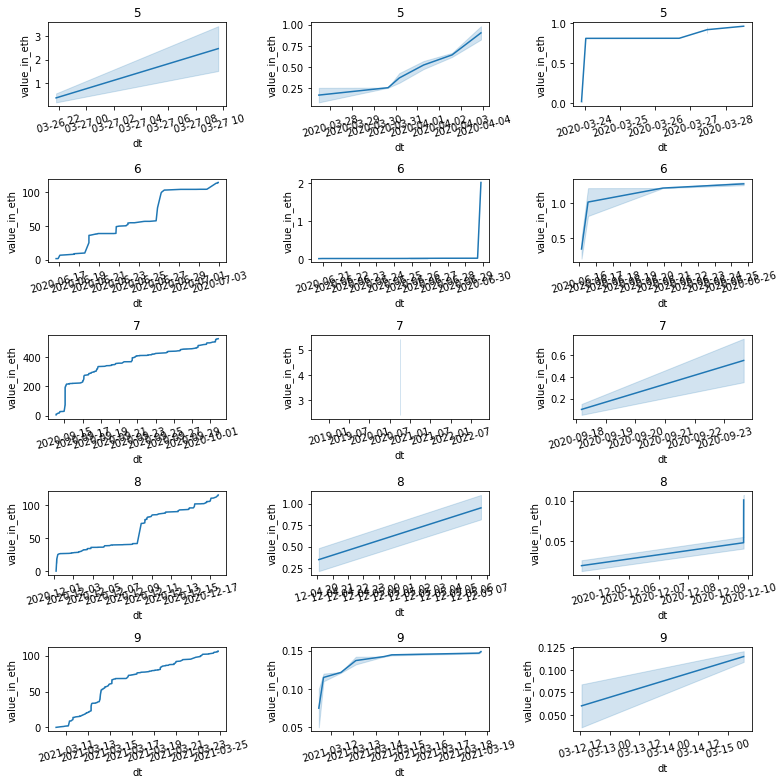

In [ ]:
cols = 3

rounds_to_plot = rounds[3:8]
fig, ax = plt.subplots(len(rounds_to_plot),cols, figsize=(11,11))

for round_index, round_num in enumerate(rounds_to_plot):
# round_num = 7
    subset = subsets[round_num]

    counts = subset.to.value_counts()
    gt = counts[counts > 5].index
    multi = subset[subset.to.isin(gt)]

    ranked_by_sum = multi.groupby('to').value_in_eth.sum().sort_values(ascending=False)
    for i, address in enumerate(
        ranked_by_sum.index[:cols]
    ):
        row = round_index
        col = i
#       cumulative_contribution = subset[
#             subset.to == address].value_in_eth.sort_index().reset_index().cumsum()


        cumulative_contribution = subset[subset.to == address].value_in_eth.sort_index().cumsum()
        sns.lineplot(data=cumulative_contribution, ax=ax[row,col])
        ax[row,col].set_title(round_num)
        ax[row,col].tick_params(axis='x', rotation=15)
plt.tight_layout()

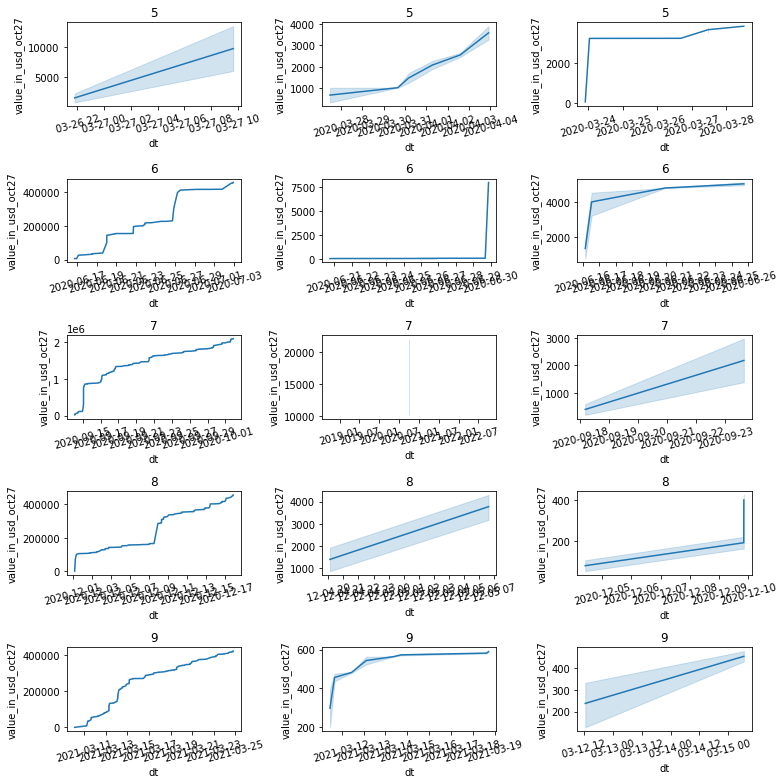

In [ ]:
cols = 3

rounds_to_plot = rounds[3:8]
fig, ax = plt.subplots(len(rounds_to_plot),cols, figsize=(11,11))

for round_index, round_num in enumerate(rounds_to_plot):
# round_num = 7
    subset = subsets[round_num]

    counts = subset.to.value_counts()
    gt = counts[counts > 5].index
    multi = subset[subset.to.isin(gt)]

    ranked_by_sum = multi.groupby('to').value_in_usd_oct27.sum().sort_values(ascending=False)
    for i, address in enumerate(
        ranked_by_sum.index[:cols]
    ):
        row = round_index
        col = i
#       cumulative_contribution = subset[
#             subset.to == address].value_in_eth.sort_index().reset_index().cumsum()


        cumulative_contribution = subset[subset.to == address].value_in_usd_oct27.sort_index().cumsum()
        sns.lineplot(data=cumulative_contribution, ax=ax[row,col])
        ax[row,col].set_title(round_num)
        ax[row,col].tick_params(axis='x', rotation=15)
plt.tight_layout()

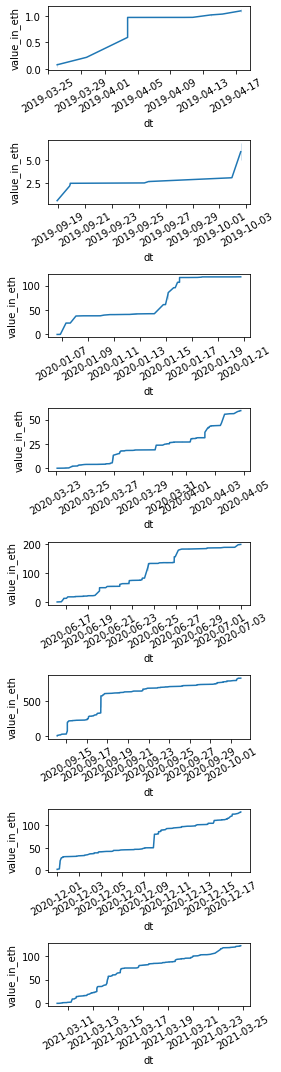

In [ ]:
rows = 8
fig, round_ax = plt.subplots(rows, 1, figsize=(4,15))

for round_num, subset in subsets.items():
    cumulative_contribution = subset.value_in_eth.sort_index().cumsum()

    row_num = round_num-2
    sns.lineplot(data=cumulative_contribution, ax=round_ax[row_num])
    round_ax[row_num].tick_params(axis='x', rotation=30)
    # relevant_cols[relevant_cols.to == address].value_in_eth.sort_index().cumsum().plot(ax=ax[row, col])
plt.tight_layout()

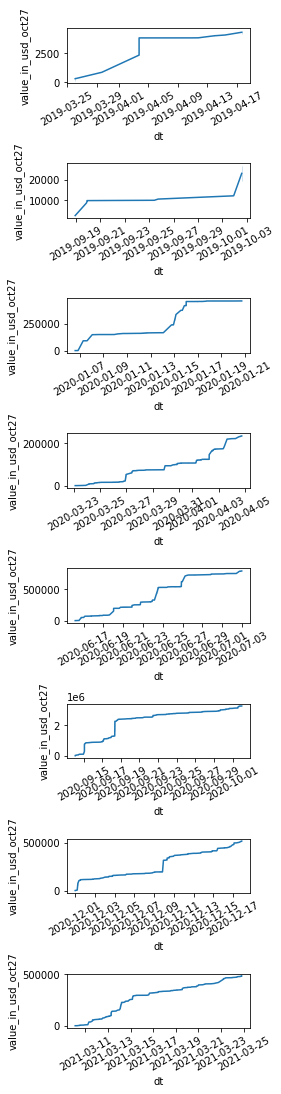

In [ ]:
rows = 8
fig, round_ax = plt.subplots(rows, 1, figsize=(4,15))

for round_num, subset in subsets.items():
    cumulative_contribution = subset.value_in_usd_oct27.sort_index().cumsum()

    row_num = round_num-2
    sns.lineplot(data=cumulative_contribution, ax=round_ax[row_num])
    round_ax[row_num].tick_params(axis='x', rotation=30)
    # relevant_cols[relevant_cols.to == address].value_in_eth.sort_index().cumsum().plot(ax=ax[row, col])
plt.tight_layout()

In [ ]:
#grouping 'to', 'from', 'value_in_eth'        
#I just converted value to USD
round_num_to_xy = {}
for round_num, subset in subsets.items():
    amount = subset.groupby('to').value_in_usd_oct27.sum()
    num_contributors = subset.groupby('to')['from'].nunique()
    merged = pd.concat([amount, num_contributors], axis=1)
    round_num_to_xy[round_num] = merged
    


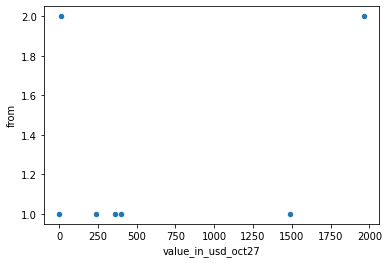

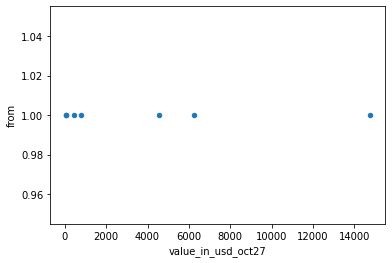

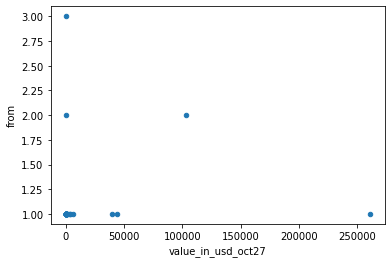

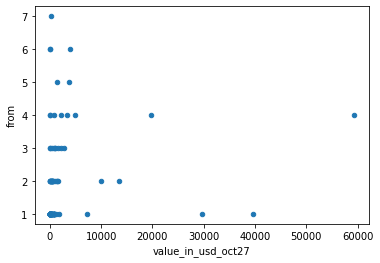

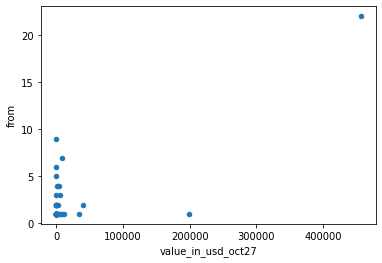

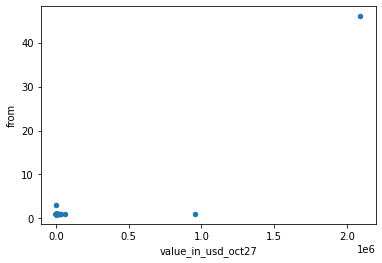

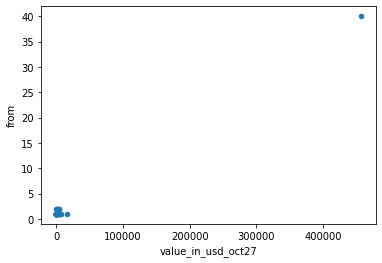

In [ ]:
#changed to value_in_usd_oct27
for round_num in range(2,9):
     round_num_to_xy[round_num].plot('value_in_usd_oct27', 'from',kind='scatter')

In [ ]:
paginated = [('Connexion', '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9'),
 ('iearn.finance', '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9'),
 ('yearn.finance', '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9'),
 ('Open Zone Finance', '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9'),
 (' Ether', '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9')]


In [ ]:
skip_addresses = [x[1] for x in paginated]
skip_addresses

['0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9',
 '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9',
 '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9',
 '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9',
 '0xa5b0c665e95545604f0a1dd0e3ecd857a9c2d2c9']

In [ ]:
for subset_num, subset in subsets.items():
    subset['round_num'] = subset_num
filtered = pd.concat(list(subsets.values()))


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
len(filtered)

1644

In [ ]:
filtered.to_csv('filtered_gitcoin_transactions.csv')

In [ ]:
filtered

NameError: name 'filtered' is not defined

## Data Dictionary
* Index (first column): UTC Timestamp as YYYY-MM-DDHH:MM:SS
* from: Wallet address of the contributor. Should only include contributors identified as "Gitcoin contributors", provided by the Gitcoin rounds api (https://gitcoin.co/grants/v1/api/export_addresses/roundX.json)
* to: Wallet address of the recipient. Should only include Gitcoin grants, listed in the Gitcoin grants api (https://gitcoin.co/grants/grants.json)
* value_in_eth: # of ETH donated
* gas: How much it cost in "gas" to send the transaction
* gasPrice: gas price at time of transaction
* roundNum: which round of Gitcoin

In [ ]:
filtered[~filtered.to.isin(skip_addresses)]

,from,to,projectName,gas,gasPrice,value_in_eth,value_in_usd_oct27,round_num
dt,,,,,,,,
2019-03-29 16:59:10,0xc024559c710123b6caf5d225b56913aab339aad0,0xa19fcdad77c1f0fd184689aca88babcf68010347,EthHub - Ethereum Information Hub,31597,10000000000,0.10,396.8330,2
2019-04-23 15:52:11,0x2764aa8c0897cf95148bf04b6a157fc885fca7f1,0x865c2f85c9fea1c6ac7f53de07554d68cb92ed88,Wizards of DApps podcast,25000,10200000000,0.01,39.6833,2
2019-04-23 15:52:11,0x2764aa8c0897cf95148bf04b6a157fc885fca7f1,0x865c2f85c9fea1c6ac7f53de07554d68cb92ed88,Wizards of DApps podcast,25000,10200000000,0.01,39.6833,2
2019-03-26 02:23:35,0xbaf6e57a3940898fd21076b139d4ab231dcbbc5f,0x2577a8539cb2194acd72f035dbb691ce5f406d3f,Trackato: DeFi,21000,1000000000,0.04,158.7332,2
2019-04-17 15:11:24,0x6b3e8d126d19208eb64a3eab2de96bccb212c8d7,0x587fb98e404a18503a24cf19abb1887704beb407,Hardhat by Nomic Labs,21000,9200000000,0.03,119.0499,2
...,...,...,...,...,...,...,...,...
2021-03-10 08:04:03,0xd1eddfcc4596cc8bd0bd7495beab9b979fc50336,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Open Zone Finance,169111,88000000000,0.00,0.0000,9
2021-03-12 17:53:15,0xd1eddfcc4596cc8bd0bd7495beab9b979fc50336,0xd1eddfcc4596cc8bd0bd7495beab9b979fc50336,BeyondNFT,21000,230000000000,0.00,0.0000,9
2021-03-24 10:09:29,0xd1eddfcc4596cc8bd0bd7495beab9b979fc50336,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Open Zone Finance,160761,133000000000,1.00,3968.3300,9


NameError: name 'skip_addresses' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32e1581d-cef2-4771-a5bf-9bbfe7a3603c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>